In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [217]:
df = pd.read_csv('data_penjualan.csv', usecols=['ReceiptNumber', 'Date', 'Items', 'Quantity', 'NetSales', 'Category'])

In [218]:
df.head(1000)

,ReceiptNumber,Date,Category,Items,Quantity,NetSales
0,TSBZIO,1/1/2023,Tea,Lemon Tea,1.0,14400.0
1,TSBZIP,1/1/2023,Tea,Lychee Tea,1.0,20800.0
2,TSBZIP,1/1/2023,Signature Coffee,Kopi Rakyat,1.0,16000.0
3,TSBZIR,1/1/2023,Signature Coffee,Kopi Rakyat,3.0,78000.0
4,TSBZIR,1/1/2023,Signature Coffee,Kopi Rakyat,1.0,26000.0
...,...,...,...,...,...,...
995,TSC0J2,1/14/2023,Milk Based,Matcha Latte,1.0,30000.0
996,TSC0J2,1/14/2023,Signature Coffee,Kopi Sultan,1.0,29000.0
997,TSC0J3,1/14/2023,Main Course,Bolognaise,1.0,40000.0
998,TSC0J3,1/14/2023,Side Dish,Sosis Bakar,1.0,28000.0


In [219]:
df.dtypes

ReceiptNumber     object
Date              object
Category          object
Items             object
Quantity         float64
NetSales         float64
dtype: object

In [220]:
#recency

day='2023-06-01'
day=pd.to_datetime(day)
df['Date']=pd.to_datetime(df['Date'])

result_df = df.drop_duplicates(subset='Items', keep=False)
recency = result_df.groupby(['Items']).agg({'Date': lambda x: ((day-x.max()).days)})
recency.head(100)

,Date
Items,
Aglio Oglio,118
Brownies Choco,89
Kopi Baileys,126
Lemon Tea,124
Lychee Yakult,4
Richbowl Rib Eye Sambal Matah,107
Strawberry Yakult,134


In [221]:
#frecuency

freq1= df.groupby(['Category', 'Items']).size()

In [222]:
freq1.head(100)

Category  Items            
Bakery    Almond Croissant      65
          Butter Croissant      73
          Koighn - Amann        49
Blend     Cookies & Cream       14
Blend     Cookies & Cream      138
                              ... 
Gofood    Kopi Rakyat           36
          Kopi Sultan           12
          Lychee Tea             1
          Lychee Yakult          1
          Mango Milk             1
Length: 100, dtype: int64

In [223]:
freq2 = df.groupby(['Category', 'Items']).size().sort_values(ascending=False)

In [102]:
freq2.head(100)

Category           Items          
Signature Coffee   Kopi Rakyat        2740
Shopee             Kopi Rakyat         778
Signature Coffee   Kopi Rakyat         561
Tea                Lychee Tea          531
Signature Coffee   Kopi Sultan         420
                                      ... 
Gofood             Kopi Rakyat          36
Gofood             Choco Origin         35
Main Course        Bolognaise           33
Gofood             Black Coffee         33
Signature Coffee   Kopi Dewan           32
Length: 100, dtype: int64

In [224]:
freq=df.groupby(["Items"])[["Category"]].count()

In [225]:
freq.head(100)

,Category
Items,
,21
Aglio Oglio,1
Aglio Oglio,109
Aglio Oglio,7
Almond Croissant,65
...,...
Kopi Kow,76
Kopi Kow,24
Kopi Rakyat,561


In [226]:
freq3=df.groupby(["Category"])[["Items"]].value_counts(ascending=True)

In [127]:
freq3.head(1000)

Category        Items              
Bakery          Koighn - Amann          49
                Almond Croissant        65
                Butter Croissant        73
Blend           Cookies & Cream         14
Blend           Cookies & Cream        138
                                      ... 
Yakult Series   Lychee Yakult            6
                Lychee Yakult           14
Yakult Series   Mango Yakult            52
                Strawberry Yakult       89
                Lychee Yakult          110
Name: count, Length: 301, dtype: int64

In [227]:
#Monetary
df["total"] = df["NetSales"]*df["Quantity"]

In [228]:
#Monetary
money = df.groupby(['Items'])[['total']].sum()
money

,total
Items,
,1086400.0
Aglio Oglio,40000.0
Aglio Oglio,6044000.0
Aglio Oglio,336000.0
Almond Croissant,2119000.0
...,...
Thai Tea,1338000.0
Vanilla Latte,857200.0
Vanilla Latte,126000.0


In [229]:
df.dtypes

ReceiptNumber            object
Date             datetime64[ns]
Category                 object
Items                    object
Quantity                float64
NetSales                float64
total                   float64
dtype: object

In [233]:
RFM=pd.concat([recency,freq,money],axis=1)
recency.columns=["Recency"]
freq.columns=["Frecuency"]
money.columns=["Monetary"]



In [234]:
RFM.head(10)

,Recency,Frecuency,Monetary
Items,,,
Aglio Oglio,118.0,1,40000.0
Brownies Choco,89.0,1,17000.0
Kopi Baileys,126.0,1,25000.0
Lemon Tea,124.0,1,26000.0
Lychee Yakult,4.0,1,28000.0
Richbowl Rib Eye Sambal Matah,107.0,1,38000.0
Strawberry Yakult,134.0,1,25000.0
,NaN,21,1086400.0
Aglio Oglio,NaN,109,6044000.0


In [235]:
#Clustering
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

sim = SimpleImputer(missing_values=np.nan, strategy='mean')
imputed_data = sim.fit_transform(RFM)

scaler=StandardScaler()
scaled=scaler.fit_transform(imputed_data)




c:\Users\1567\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\1567\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\1567\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\1567\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\

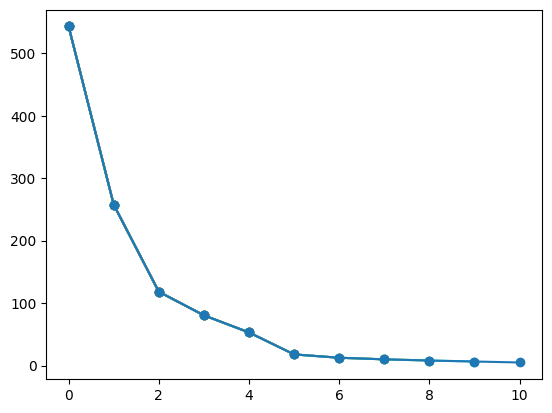

In [236]:
#Clustering
from sklearn.cluster import KMeans

inertia=[]
for i in np.arange(1,12):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(scaled)
    inertia.append(kmeans.inertia_)
    plt.plot(inertia, marker='o')
    

In [247]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(scaled)
RFM["Cluster"]=(kmeans.labels_ +1)

c:\Users\1567\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [248]:
RFM

,Recency,Frecuency,Monetary,Cluster
Items,,,,
Aglio Oglio,118.0,1,40000.0,1
Brownies Choco,89.0,1,17000.0,1
Kopi Baileys,126.0,1,25000.0,1
Lemon Tea,124.0,1,26000.0,1
Lychee Yakult,4.0,1,28000.0,3
...,...,...,...,...
Thai Tea,NaN,29,1338000.0,1
Vanilla Latte,NaN,26,857200.0,1
Vanilla Latte,NaN,4,126000.0,1


In [255]:
group=RFM.groupby(['Cluster'])[['Recency','Frecuency', 'Monetary']].apply(lambda x: x)
group

Recency  Frecuency      Monetary
Cluster Items                                                           
1       Aglio Oglio                       118.0          1  4.000000e+04
        Brownies Choco                     89.0          1  1.700000e+04
        Kopi Baileys                      126.0          1  2.500000e+04
        Lemon Tea                         124.0          1  2.600000e+04
        Richbowl Rib Eye Sambal Matah     107.0          1  3.800000e+04
...                                         ...        ...           ...
        Vanilla Latte                       NaN         39  1.210000e+06
        Vanilla Latte                       NaN         12  6.000000e+05
2       Kopi Rakyat                         NaN       2829  1.641509e+08
        Kopi Rakyat                         NaN       1147  1.255358e+08
3       Lychee Yakult                       4.0          1  2.800000e+04

[181 rows x 3 columns]